# Assignment 1 - Linear Regression

### Linear Regression with One Variable

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
data = pd.read_csv('data\ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,97.0,8.159800,3.869884,5.0269,5.7077,6.5894,8.5781,22.203
Profit,97.0,5.839135,5.510262,-2.6807,1.9869,4.5623,7.0467,24.147


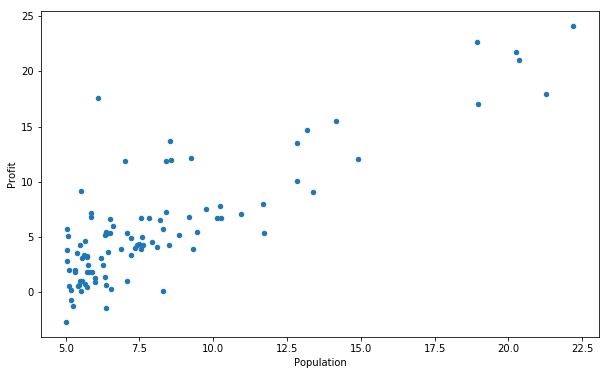

In [9]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(10,6)) 

Text(0.5,0,'Population of City in 10,000s')

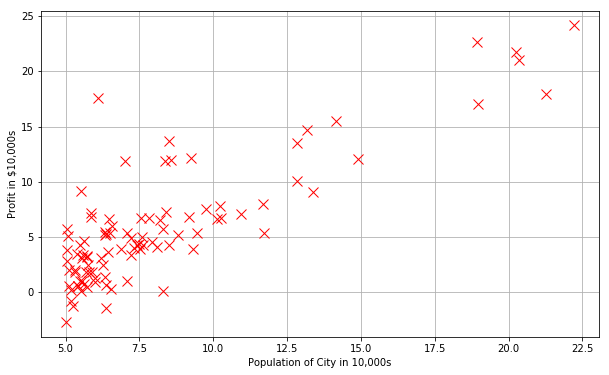

In [11]:
#Plot the data to see what it looks like
plt.figure(figsize=(10,6))
plt.plot(data.Population,data.Profit,'rx',markersize=10)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [12]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [13]:
data.insert(0, 'Ones', 1)


In [14]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [15]:
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

In [20]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [21]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [22]:
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))  

In [23]:
theta

matrix([[0, 0]])

In [27]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [28]:
computeCost(X, y, theta)

32.072733877455676

In [29]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [34]:
alpha = 0.01  
iters = 2000

In [35]:
g, cost = gradientDescent(X, y, theta, alpha, iters)  
g  

matrix([[-3.78806857,  1.18221277]])

In [36]:
computeCost(X, y, g)  

4.4780276098799705

Text(0.5,1,'Error vs. Training Epoch')

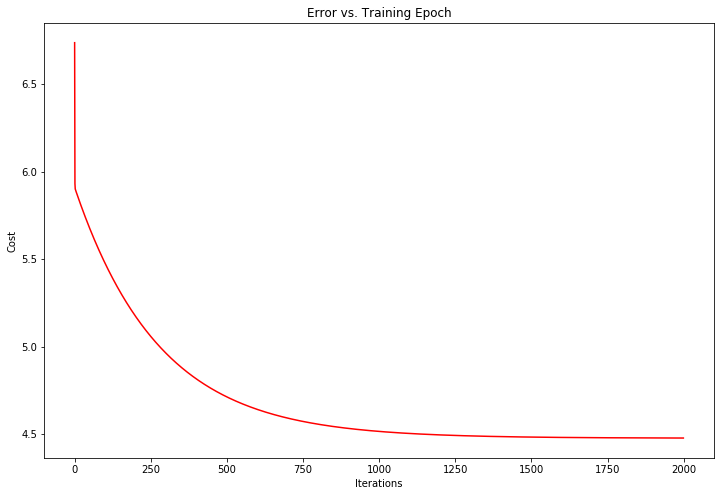

In [37]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

### Linear Regression with Multiple Variable